# Attach percentage Analysis Report
**Jumbo & Company - Device Insurance Attach Performance**

#### 1. Objective
#### 2. Data Overview
#### 3. Data Validaion & Observation
#### 4. Month-wise Analysis
#### 5. Store- wsie Analysis
#### 6. Branch- wise Analysis
#### 7. Store categorization
#### 8. January attach percentage prediction
#### 9. Conclusion & Recommendation

# 1. Objective:
 - Analyze device insurance attach percentage performance across stores, branches and months.
 - Categorisation of stores based on attach percentage.
 - predict percentage for january using previous monthly dataset.

# 2. Data Overview:
1. What each row represents?
   - Each row represents the attach percentage performance of an individual retail store.
2. What each column represents?
    - the given columns of the dataset are branch name, store name and monthly attach percentage values.
3. Time period covered.
    - Montly data is available from August to december.
4. What attach percentage means for business?
    - Attach percentage helps to understand how many customer bought device insurance plans like( Screen protection/ Extended Warranty / Accidental Damage kind of plans). means better the attach percentage, better it is for Zopper business.
4. Level of data.
   - the data is structured at a store-level and aggregated on a montly basis.

# 3. Data Validation & Observations
- The dataset was validated to ensure completeness, correct structure, and suitability for further analysis.

In [19]:
import pandas as pd

dataset = pd.read_excel("Jumbo_and_Company_attach_percentage.xlsx")
dataset.head()


,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug
0,Delhi_Ncr,Delhi(Janakpuri) Br,0.23,0.17,0.16,0.25,0.24
1,Delhi_Ncr,Haryana(Gurgaon) Br,0.21,0.26,0.15,0.28,0.04
2,Delhi_Ncr,Up(Greater Noida) Br,0.25,0.36,0.30,0.41,0.43
3,Pune,Pune(Bhosari) Br,0.33,0.33,0.36,0.13,0.32
4,Gujarat,Ahmedabad(Maninagar) Br,0.19,0.11,0.14,0.21,0.17


In [26]:
dataset.shape

(163, 7)

#### 3.1 check missing values

In [20]:
dataset.isnull().sum()

Branch        0
Store_Name    0
Dec           0
Nov           0
Oct           0
Sep           0
Aug           0
dtype: int64

In [22]:
dataset.columns

Index(['Branch', 'Store_Name', 'Dec', 'Nov', 'Oct', 'Sep', 'Aug'], dtype='object')

#### 3.2 Reordering the columns to maintain the chronological order

In [28]:
dataset = dataset[['Branch', 'Store_Name', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
dataset.head()

,Branch,Store_Name,Aug,Sep,Oct,Nov,Dec
0,Delhi_Ncr,Delhi(Janakpuri) Br,0.24,0.25,0.16,0.17,0.23
1,Delhi_Ncr,Haryana(Gurgaon) Br,0.04,0.28,0.15,0.26,0.21
2,Delhi_Ncr,Up(Greater Noida) Br,0.43,0.41,0.30,0.36,0.25
3,Pune,Pune(Bhosari) Br,0.32,0.13,0.36,0.33,0.33
4,Gujarat,Ahmedabad(Maninagar) Br,0.17,0.21,0.14,0.11,0.19


In [23]:
dataset.dtypes

Branch         object
Store_Name     object
Dec           float64
Nov           float64
Oct           float64
Sep           float64
Aug           float64
dtype: object

#### 3.3 Statistical analysis

In [24]:
dataset.describe()

,Dec,Nov,Oct,Sep,Aug
count,163.000000,163.000000,163.000000,163.000000,163.000000
mean,0.217239,0.217117,0.170920,0.167301,0.128589
std,0.173270,0.131246,0.116125,0.134518,0.116640
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.095000,0.130000,0.100000,0.080000,0.035000
50%,0.200000,0.200000,0.160000,0.150000,0.110000
75%,0.300000,0.295000,0.240000,0.245000,0.190000
max,1.000000,0.700000,0.710000,0.800000,0.600000


## Data Validation & Observations insights

1. The dataset contains 163 rows and 7 columns, namely *Branch*, *Store_Name*, and monthly attach percentages from August to December. Monthly columns were reordered to ensure proper chronological analysis.

2. No null or missing values were observed across any columns, indicating a complete dataset suitable for analysis.

3. Attach percentage values range from 0% to 100%, which falls within a valid business range.

4. The wide performance spread highlights clear differences between high-performing and low-performing stores, making the dataset suitable for store categorization and targeted analysis.


# 4. Month-wise 
To analyze overall attach percentage trends across months.

#### 4.1 Month-wise average table

In [30]:
month_avg = dataset[['Aug', 'Sep', 'Oct', 'Nov', 'Dec']].mean().reset_index()
month_avg.columns = ['Month', 'Avg Attach %']
month_avg


,Month,Avg Attach %
0,Aug,0.128589
1,Sep,0.167301
2,Oct,0.170920
3,Nov,0.217117
4,Dec,0.217239


#### 4.2 Month-wise trend visualization

In [34]:
import matplotlib.pyplot as plt

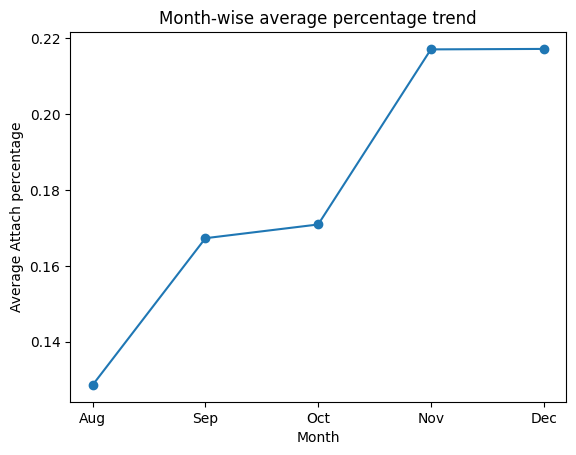

In [38]:
plt.plot(month_avg['Month'], month_avg['Avg Attach %'], marker = 'o')
plt.xlabel('Month')
plt.ylabel('Average Attach percentage')
plt.title('Month-wise average percentage trend')
plt.show()

## Month-wise insights
1. The average attach percentage shows a clear trend across the observed months.
2. A noticeable change is observed between consecutive months, indicating variation in customer insurance adoption.
3. Performance appears stronger towards the later months, suggesting improved attach behavior over time.

# 5. Store-wise Analysis
To evaluate attach percentage performance at the individual store level and identify performance variations.

#### 5.1 Average attach % per store

In [39]:
dataset['Avg_Store_Attach_%'] = dataset[['Aug', 'Sep', 'Oct', 'Nov', 'Dec']].mean(axis=1)
dataset[['Store_Name', 'Avg_Store_Attach_%']].head()


,Store_Name,Avg_Store_Attach_%
0,Delhi(Janakpuri) Br,0.210
1,Haryana(Gurgaon) Br,0.188
2,Up(Greater Noida) Br,0.350
3,Pune(Bhosari) Br,0.294
4,Ahmedabad(Maninagar) Br,0.164


#### 5.2 Visualize store performance

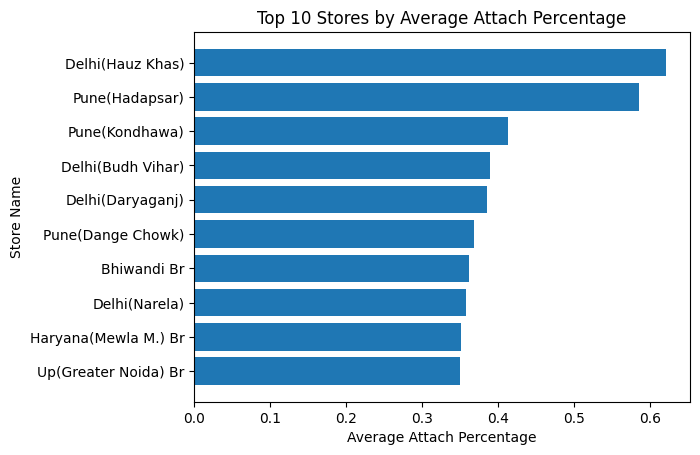

In [43]:
top_stores = dataset[['Store_Name', 'Avg_Store_Attach_%']].sort_values(
    by='Avg_Store_Attach_%',
    ascending=False
).head(10)

plt.barh(top_stores['Store_Name'], top_stores['Avg_Store_Attach_%'])
plt.xlabel('Average Attach Percentage')
plt.ylabel('Store Name')
plt.title('Top 10 Stores by Average Attach Percentage')
plt.gca().invert_yaxis()
plt.show()


## Store-wise Insights
- Attach percentage is not the same for all stores, which means some stores sell insurance better than others.
- A few stores perform consistently well, and their approach can be used as a reference for other stores.

# 6. Branch-wise Analysis
To compare attach percentage performance across branches and understand regional-level trends.

#### 6.1 Calculate average attach % per branch

In [42]:
branch_avg = dataset.groupby('Branch')[['Aug', 'Sep', 'Oct', 'Nov', 'Dec']].mean().mean(axis=1).reset_index()
branch_avg.columns = ['Branch', 'Avg_Branch_Attach_%']
branch_avg


,Branch,Avg_Branch_Attach_%
0,Delhi_Ncr,0.243682
1,Gujarat,0.134583
2,Mumbai,0.173474
3,Pune,0.276500
4,Telangana,0.118350
5,Thane,0.148600


#### 7.2 Visualize branch performance

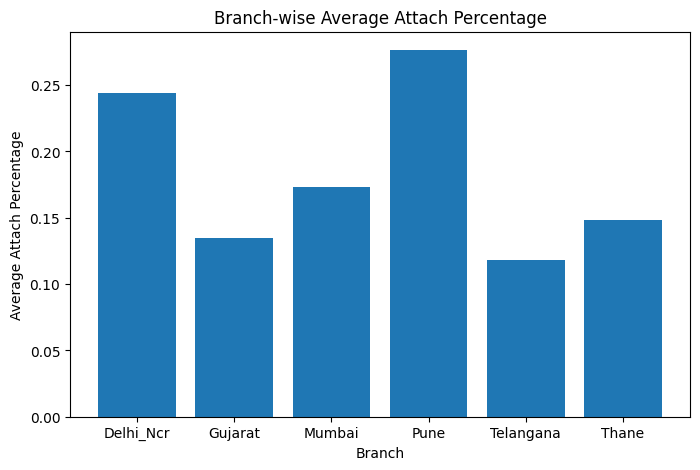

In [44]:
plt.figure(figsize=(8,5))
plt.bar(branch_avg['Branch'], branch_avg['Avg_Branch_Attach_%'])
plt.xlabel('Branch')
plt.ylabel('Average Attach Percentage')
plt.title('Branch-wise Average Attach Percentage')
plt.show()


## Branch-wise Insights
- Attach percentage varies across different branches.
- Some branches perform better than others, indicating differences in overall store performance at the branch level.


# 7. Store Categorization
To classify stores into performance categories based on attach percentage for targeted insights.

### 7.1 Store Categorization Logic
Stores are categorized based on their average attach percentage:
- High Performing Stores: Average attach percentage ≥ 40%
- Medium Performing Stores: Average attach percentage between 20% and 40%
- Low Performing Stores: Average attach percentage < 20%


In [59]:
def categorize_store(value):
    if value >= 0.40:
        return 'High Performing'
    elif value >= 0.20:
        return 'Medium Performing'
    else:
        return 'Low Performing'

dataset['Store_Category'] = dataset['Avg_Store_Attach_%'].apply(categorize_store)
dataset[['Store_Name', 'Avg_Store_Attach_%', 'Store_Category']].head()


,Store_Name,Avg_Store_Attach_%,Store_Category
0,Delhi(Janakpuri) Br,0.210,Medium Performing
1,Haryana(Gurgaon) Br,0.188,Low Performing
2,Up(Greater Noida) Br,0.350,Medium Performing
3,Pune(Bhosari) Br,0.294,Medium Performing
4,Ahmedabad(Maninagar) Br,0.164,Low Performing


In [60]:
category_summary = dataset['Store_Category'].value_counts()
category_summary


Store_Category
Low Performing       102
Medium Performing     58
High Performing        3
Name: count, dtype: int64

#### 7.2 Visualization

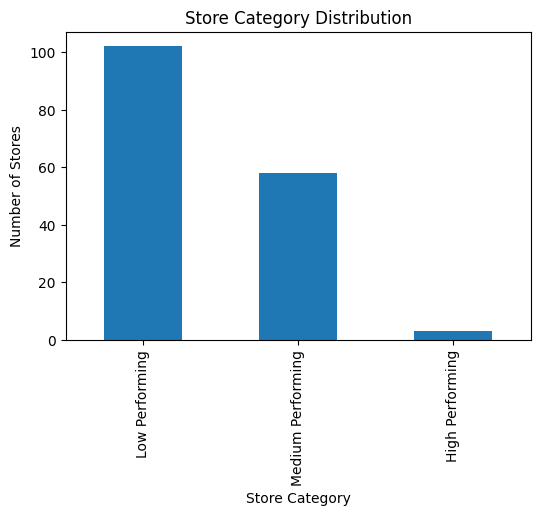

In [61]:
plt.figure(figsize=(6,4))
category_summary.plot(kind='bar')
plt.xlabel('Store Category')
plt.ylabel('Number of Stores')
plt.title('Store Category Distribution')
plt.show()


## store categorization insights
1. Majority of the stores fall under the low performing category, indicating low insurance attach adoption across most locations.
2. A moderate number of stores show medium performance, suggesting potential for improvement with focused efforts.
3. Only a few stores are high performing, which can be studied to understand best practices.

# 8. January attach percentage prediction

#### 8.1 Approach: 
- we'll use simple average-based prediction. because we have very less amount of data available to use complex ML models.

In [72]:
dataset['Jan_Predicted_Attach_Percentage'] = dataset['Avg_Store_Attach_%']

,Branch,Store_Name,Aug,Sep,Oct,Nov,Dec,Avg_Store_Attach_%,Store_Category,Jan_Predicted_Attach_Percentage
0,Delhi_Ncr,Delhi(Janakpuri) Br,0.24,0.25,0.16,0.17,0.23,0.210,Medium Performing,0.210
1,Delhi_Ncr,Haryana(Gurgaon) Br,0.04,0.28,0.15,0.26,0.21,0.188,Low Performing,0.188
2,Delhi_Ncr,Up(Greater Noida) Br,0.43,0.41,0.30,0.36,0.25,0.350,Medium Performing,0.350
3,Pune,Pune(Bhosari) Br,0.32,0.13,0.36,0.33,0.33,0.294,Medium Performing,0.294
4,Gujarat,Ahmedabad(Maninagar) Br,0.17,0.21,0.14,0.11,0.19,0.164,Low Performing,0.164


In [73]:
dataset[['Branch', 'Store_Name', 'Jan_Predicted_Attach_Percentage']].head()

,Branch,Store_Name,Jan_Predicted_Attach_Percentage
0,Delhi_Ncr,Delhi(Janakpuri) Br,0.210
1,Delhi_Ncr,Haryana(Gurgaon) Br,0.188
2,Delhi_Ncr,Up(Greater Noida) Br,0.350
3,Pune,Pune(Bhosari) Br,0.294
4,Gujarat,Ahmedabad(Maninagar) Br,0.164


## Insights
1. Stores with consistently higher historical attach percentages are expected to continue performing better in January.
2. Low-performing stores are likely to remain low without targeted interventions.

# 9. Conclusion & Recommendations

## 9.1 Conclusion

1. The analysis highlights that the overall device insurance attach percentage remains relatively low across most stores.
2. Month-wise analysis shows minor fluctuations, with no strong upward trend observed over the period from August to December.
3. Store-wise and branch-wise analysis indicates significant variation in performance, suggesting that attach percentage is influenced by store-level execution rather than regional factors alone.
4. Store categorization reveals that a majority of stores fall under the low-performing category, indicating a large opportunity for improvement.
5. The January attach percentage prediction suggests that, without targeted interventions, attach performance is likely to remain at similar levels.

## 9.2 Recommendations

1. Focus on improving attach awareness at the store level through staff training and standardized sales pitches for insurance products.
2. Identify top-performing stores and replicate their best practices across low-performing locations.
3. Introduce incentives or targets for store staff to encourage higher insurance attachment.
4. Monitor attach percentage on a monthly basis to quickly identify declining trends and take corrective actions.
5. Prioritize low-performing stores for improvement initiatives, as they represent the largest potential for growth.